# About
Explore timeseries and Pandas `datetime` format.

## References
- Pandas timeseries intro: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html
- Pandas timeseries userguide: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-overview
- Data source: https://github.com/pandas-dev/pandas/blob/master/doc/data/air_quality_no2_long.csv

# Basic imports

In [53]:
# General
import os
import sys
from tqdm import tqdm
from time import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [56]:
import datetime

In [2]:
sns.set_style("whitegrid")

# Load and prep dataset

In [69]:
df_raw = pd.read_csv("./air_quality_no2_long.csv")

In [70]:
df_raw

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [71]:
df = df_raw.copy()

The dates are of `str` type. Change into `pandas` `datetime`.

In [72]:
df = df.rename(columns={'date.utc': 'date'})

In [73]:
df.date = pd.to_datetime(df.date)

In [74]:
df.date.dtype

datetime64[ns, UTC]

# Examples of working with `datetime` series

## Get oldest, latest dates

In [75]:
df.date.min(), df.date.max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

## Calculate difference between dates
Differences are represented by `timedelta` objects

In [76]:
dt = df.date.min() -  df.date.max()
dt

Timedelta('-45 days +01:00:00')

In [48]:
dt.days

-45

In [78]:
df.date.diff()

0                    NaT
1      -1 days +23:00:00
2      -1 days +23:00:00
3      -1 days +23:00:00
4      -1 days +23:00:00
              ...       
2063   -1 days +23:00:00
2064   -1 days +22:00:00
2065   -1 days +23:00:00
2066   -1 days +23:00:00
2067   -1 days +23:00:00
Name: date, Length: 2068, dtype: timedelta64[ns]

Manually shift by a day:

In [79]:
df.date + pd.Timedelta("1 day")

0      2019-06-22 00:00:00+00:00
1      2019-06-21 23:00:00+00:00
2      2019-06-21 22:00:00+00:00
3      2019-06-21 21:00:00+00:00
4      2019-06-21 20:00:00+00:00
                  ...           
2063   2019-05-08 06:00:00+00:00
2064   2019-05-08 04:00:00+00:00
2065   2019-05-08 03:00:00+00:00
2066   2019-05-08 02:00:00+00:00
2067   2019-05-08 01:00:00+00:00
Name: date, Length: 2068, dtype: datetime64[ns, UTC]

Can also use `datetime`s function:

In [80]:
df.date + datetime.timedelta(1)

0      2019-06-22 00:00:00+00:00
1      2019-06-21 23:00:00+00:00
2      2019-06-21 22:00:00+00:00
3      2019-06-21 21:00:00+00:00
4      2019-06-21 20:00:00+00:00
                  ...           
2063   2019-05-08 06:00:00+00:00
2064   2019-05-08 04:00:00+00:00
2065   2019-05-08 03:00:00+00:00
2066   2019-05-08 02:00:00+00:00
2067   2019-05-08 01:00:00+00:00
Name: date, Length: 2068, dtype: datetime64[ns, UTC]

## Access by month, day, quarter, etc.

A `datetime` series as a properties object stored in the attribute `dt`

In [96]:
df.date.dt

In [95]:
[attr for attr in dir(df.date.dt) if not attr.startswith("_") and not attr.endswith("_")]

['ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_name',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 'time',
 'timetz',
 'to_period',
 'to_pydatetime',
 'tz',
 'tz_convert',
 'tz_localize',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [103]:
df.date.dt.quarter

0       2
1       2
2       2
3       2
4       2
       ..
2063    2
2064    2
2065    2
2066    2
2067    2
Name: date, Length: 2068, dtype: int64

* Plot data as a function of the hour:

In [157]:
df['hour'] = df.date.dt.hour

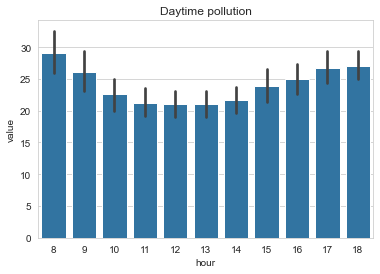

In [169]:
ax = sns.barplot(data=df.query('hour > 7 and hour < 19'), x='hour', y='value', color='C0')
ax.set_title("Daytime pollution");

## Aggregate per month, day, etc.
For instance say we want to calculate value statistics per week for each location.

In [155]:
# groupby accepts a Series as input
df.groupby(by=[df.date.dt.isocalendar().week, "location"]).value.describe()

count       mean        std   min     25%    50%  \
week location                                                               
19   BETR801              12.0  23.875000  12.047491  10.5  19.375  20.50   
     FR04014             140.0  27.393571  13.330315   8.7  17.950  25.25   
     London Westminster  134.0  31.067164  11.778148  16.0  24.000  29.00   
20   BETR801              38.0  23.118421   8.373409  11.5  16.125  21.75   
     FR04014             167.0  26.359281  13.239099   0.0  16.000  24.80   
     London Westminster  167.0  30.694611   5.860540  21.0  27.000  30.00   
21   BETR801              22.0  29.568182  16.041832   9.0  20.125  25.75   
     FR04014             165.0  33.716970  18.342861  10.3  19.500  28.60   
     London Westminster  167.0  30.287425   8.047376  15.0  25.000  29.00   
22   BETR801               6.0  18.583333  17.284145   7.5   9.375  10.75   
     FR04014             165.0  24.010303  14.134962   0.0  15.000  20.50   
     London Westminster  167.0  21.670659  11.004075   0.0  16.000  22.00   
23   BETR801               2.0  12.500000   3.535534  10.0  11.250  12.50   
     FR04014             151.0  26.730464  12.834817   7.2  15.650  25.00   
     London Westminster  163.0  15.484663   9.999602   0.0   7.000  17.00   
24   BETR801               7.0  24.571429  12.043077   7.5  18.000  21.00   
     FR04014             165.0  26.598182  16.045896   0.0  14.400  22.60   
     London Westminster  159.0  21.157233   9.679376   4.0  14.000  20.00   
25   BETR801               8.0  40.625000   3.420004  35.5  38.625  41.50   
     FR04014              51.0  32.635294  17.642107   9.6  19.150  26.50   
     London Westminster   12.0  12.916667   2.234373  11.0  11.000  12.50   

                            75%   max  
week location                          
19   BETR801             23.875  50.5  
     FR04014             33.925  77.7  
     London Westminster  34.750  97.0  
20   BETR801             29.125  41.5  
     FR04014             33.750  67.5  
     London Westminster  33.000  49.0  
21   BETR801             33.875  74.5  
     FR04014             43.000  97.0  
     London Westminster  33.500  60.0  
22   BETR801             18.500  52.5  
     FR04014             28.800  84.7  
     London Westminster  29.000  52.0  
23   BETR801             13.750  15.0  
     FR04014             36.700  59.0  
     London Westminster  22.000  40.0  
24   BETR801             32.500  42.5  
     FR04014             35.500  78.3  
     London Westminster  26.000  51.0  
25   BETR801             42.750  45.0  
     FR04014             49.350  73.3  
     London Westminster  14.000  17.0

To change the frequency of the date, the `resample` function can be used after making `datetime` the index (below). 

## Using `datetime` as index
Note this may not work for non-unique timestamps.

In [215]:
df_dated = df.set_index('date')
df_dated

,city,country,location,parameter,value,unit,hour
date,,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³,0
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³,23
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³,22
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³,21
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³,20
...,...,...,...,...,...,...,...
2019-05-07 06:00:00+00:00,London,GB,London Westminster,no2,26.0,µg/m³,6
2019-05-07 04:00:00+00:00,London,GB,London Westminster,no2,16.0,µg/m³,4
2019-05-07 03:00:00+00:00,London,GB,London Westminster,no2,19.0,µg/m³,3


Note: above the index was not sorted which leads to issues when trying use timespace slicing (below).

In [216]:
# Now access the datetime properties directly via the index
df_dated.index.hour

Int64Index([ 0, 23, 22, 21, 20, 19, 18, 17, 16, 15,
            ...
            11, 10,  9,  8,  7,  6,  4,  3,  2,  1],
           dtype='int64', name='date', length=2068)

<AxesSubplot:xlabel='date'>

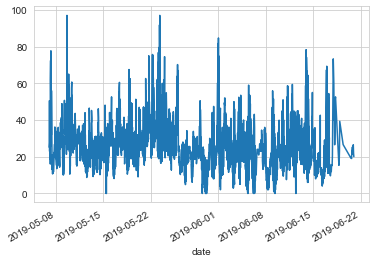

In [217]:
# Pandas plots will pick up the index
df_dated['value'].plot()

In [222]:
# Slicing can be used to select a time-interval
df_dated = df_dated.sort_index()

In [228]:
df_dated['2019-05-15':'2019-06-01']

,city,country,location,parameter,value,unit,hour
date,,,,,,,
2019-05-15 00:00:00+00:00,London,GB,London Westminster,no2,22.0,µg/m³,0
2019-05-15 00:00:00+00:00,Paris,FR,FR04014,no2,18.8,µg/m³,0
2019-05-15 01:00:00+00:00,Antwerpen,BE,BETR801,no2,25.5,µg/m³,1
2019-05-15 01:00:00+00:00,Paris,FR,FR04014,no2,17.2,µg/m³,1
2019-05-15 02:00:00+00:00,London,GB,London Westminster,no2,22.0,µg/m³,2
...,...,...,...,...,...,...,...
2019-06-01 21:00:00+00:00,Paris,FR,FR04014,no2,49.4,µg/m³,21
2019-06-01 22:00:00+00:00,Paris,FR,FR04014,no2,48.1,µg/m³,22
2019-06-01 22:00:00+00:00,London,GB,London Westminster,no2,52.0,µg/m³,22


<AxesSubplot:xlabel='date'>

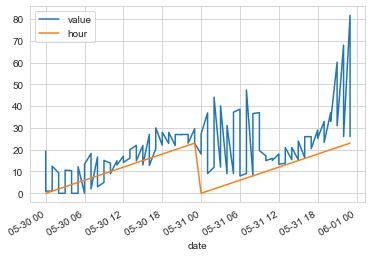

In [239]:
# Plot two days
df_dated['2019-05-30':'2019-05-31'].plot()

<AxesSubplot:xlabel='date'>

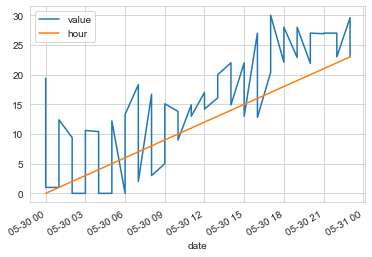

In [238]:
# Plot one day
df_dated['2019-05-30':'2019-05-30'].plot()

<AxesSubplot:xlabel='date'>

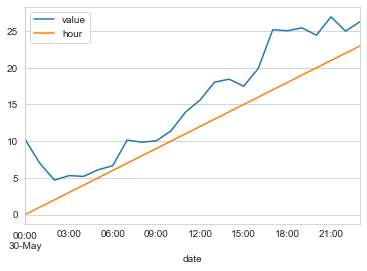

In [286]:
# Aggregate over 6h using the mean 
df_dated.resample('1h').mean()['2019-05-30':'2019-05-30'].plot()

Note how the date labels changed from the format *MM-dd HH* to the time *HH:mm*. Likely this is picked up from the `freq` attribute which is set when applying `resample`.

In [298]:
df_dated['2019-05-30':'2019-05-30'].index.freq is None

True

In [299]:
df_dated.resample('1h').mean()['2019-05-30':'2019-05-30'].index.freq

<Hour>

<AxesSubplot:xlabel='date'>

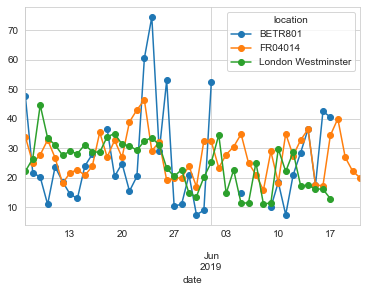

In [313]:
df_dated.groupby('location').resample('D').mean().reset_index().pivot(index='date', columns='location', values='value').plot(style='-o')

In [316]:
df.pivot(index='date', columns='location', values='value')

location,BETR801,FR04014,London Westminster
date,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


For instance, to get the daily mean values per location, first "align" the the categorical `location` variable in time by making each category into a column (some timestamps will be `NaN`).

In [319]:
df_dated_splitby_location = df_dated.pivot(columns='location', values='value')
df_dated_splitby_location

location,BETR801,FR04014,London Westminster
date,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


Now calculate daily means and plot:

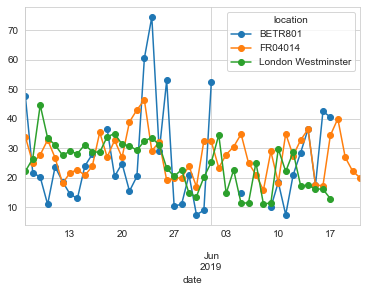

In [330]:
ax = df_dated_splitby_location.resample('d').mean().plot(style='o-')